In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# follows django database settings format, replace with your own settings
DATABASES = {
    'datafinal':{
        'POSTGRES_DBNAME': 'postgres',
        'POSTGRES_USERNAME': 'postgres',
        'POSTGRES_PASSWORD': 'rootroot',
        'POSTGRES_ADDRESS': 'datafinal.c50h51d04cbn.us-east-2.rds.amazonaws.com',
        'POSTGRES_PORT': 5432,
    },
}

# choose the database to use
db = DATABASES['datafinal']

# construct an engine connection string
engine_string =  ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username= db['POSTGRES_USERNAME'],
                      password= db['POSTGRES_PASSWORD'],
                      ipaddress= db['POSTGRES_ADDRESS'],
                      port= db['POSTGRES_PORT'],
                      dbname= db['POSTGRES_DBNAME'])
               )

# create sqlalchemy engine
engine = create_engine(engine_string)

# read a table from database into pandas dataframe, replace "tablename" with your table name
new_train = pd.read_sql_table('train', engine)
new_train.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,60.0,Business travel,Business,912.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,neutral or dissatisfied
1,Male,disloyal Customer,38.0,Business travel,Business,208.0,3.0,3.0,3.0,4.0,...,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,neutral or dissatisfied
2,Male,Loyal Customer,31.0,Business travel,Business,3147.0,1.0,1.0,1.0,1.0,...,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,satisfied
3,Male,Loyal Customer,53.0,Business travel,Business,2327.0,3.0,2.0,2.0,2.0,...,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,neutral or dissatisfied
4,Male,Loyal Customer,30.0,Personal Travel,Eco,650.0,3.0,4.0,3.0,4.0,...,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,neutral or dissatisfied


In [2]:
# read a table from database into pandas dataframe, replace "tablename" with your table name
new_test = pd.read_sql_table('test', engine)
new_test.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,3.0,4.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,3.0,1.0,...,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,2.0,4.0,...,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,Female,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,4.0,3.0,...,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [5]:
# Create features for new train
nw_tr = new_train.drop(columns="satisfaction", axis=1)
X_train = pd.get_dummies(nw_tr)

# Create target
y_train0 = new_train["satisfaction"]

X_train

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,60.0,912.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,...,23.0,0,1,1,0,1,0,1,0,0
1,38.0,208.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0,...,0.0,0,1,0,1,1,0,1,0,0
2,31.0,3147.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,...,0.0,0,1,1,0,1,0,1,0,0
3,53.0,2327.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,...,182.0,0,1,1,0,1,0,1,0,0
4,30.0,650.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,...,0.0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,39.0,3483.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,5.0,...,0.0,1,0,1,0,1,0,1,0,0
103590,42.0,3636.0,0.0,5.0,0.0,4.0,2.0,5.0,4.0,1.0,...,0.0,0,1,1,0,1,0,1,0,0
103591,64.0,376.0,1.0,5.0,1.0,1.0,2.0,4.0,5.0,4.0,...,0.0,1,0,1,0,0,1,0,1,0
103592,57.0,192.0,5.0,5.0,5.0,1.0,2.0,4.0,5.0,4.0,...,0.0,1,0,1,0,0,1,0,1,0


In [6]:
# Create features for new test
nw_ts = new_test.drop(columns="satisfaction", axis=1)
X_test = pd.get_dummies(nw_ts)

# Create target
y_test0 = new_test["satisfaction"]

X_test

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52.0,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,...,44.0,1,0,1,0,1,0,0,1,0
1,36.0,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,...,0.0,1,0,1,0,1,0,1,0,0
2,20.0,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,...,0.0,0,1,0,1,1,0,0,1,0
3,44.0,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,...,6.0,0,1,1,0,1,0,1,0,0
4,49.0,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,...,20.0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,34.0,526.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,...,0.0,0,1,0,1,1,0,1,0,0
25889,23.0,646.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0,1,1,0,1,0,1,0,0
25890,17.0,828.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,...,0.0,1,0,1,0,0,1,0,1,0
25891,14.0,1127.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,...,0.0,0,1,1,0,1,0,1,0,0


In [7]:
y_train0.describe()

count                      103594
unique                          2
top       neutral or dissatisfied
freq                        58697
Name: satisfaction, dtype: object

In [8]:
y_test0.describe()

count                       25893
unique                          2
top       neutral or dissatisfied
freq                        14528
Name: satisfaction, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#Encode text labels into numerical values
le = LabelEncoder()
y_train = le.fit_transform(y_train0)
y_test = le.fit_transform(y_test0)

In [11]:
# Check the balance of target values
#y_encoded.value_counts()
print(y_train)
print(y_test)

[0 0 1 ... 0 1 0]
[1 1 0 ... 0 1 0]


In [12]:
le.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [13]:
pd.Series(y_train).value_counts()

0    58697
1    44897
dtype: int64

In [14]:
pd.Series(y_test).value_counts()

0    14528
1    11365
dtype: int64

In [15]:
X_train.count()

Age                                  103594
Flight Distance                      103594
Inflight wifi                        103594
Departure/Arrival_time_convenient    103594
Ease_of_Online booking               103594
Gate_location                        103594
Food_and_drink                       103594
Online boarding                      103594
Seat comfort                         103594
Inflight entertainment               103594
On-board service                     103594
Leg room service                     103594
Baggage handling                     103594
Checkin service                      103594
Inflight service                     103594
Cleanliness                          103594
Departure_Delay_in_Minutes           103594
Arrival_Delay_in_Minutes             103594
Gender_Female                        103594
Gender_Male                          103594
Customer_Loyal Customer              103594
Customer_disloyal Customer           103594
Type_of_Travel_Business travel  

In [16]:
X_train.dtypes

Age                                  float64
Flight Distance                      float64
Inflight wifi                        float64
Departure/Arrival_time_convenient    float64
Ease_of_Online booking               float64
Gate_location                        float64
Food_and_drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure_Delay_in_Minutes           float64
Arrival_Delay_in_Minutes             float64
Gender_Female                          uint8
Gender_Male                            uint8
Customer_Loyal Customer                uint8
Customer_disloyal Customer             uint8
Type_of_Tr

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [18]:
# Train the data
classifier.fit(X_train, y_train)
#print(y_encoded)
#new_train.dtypes


LogisticRegression(random_state=1)

In [19]:
# Predict outcomes for train data set
predictions = classifier.predict(X_test)
df =pd.DataFrame({"Prediction": predictions, "Actual": y_test})
df


,Prediction,Actual
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
25888,1,0
25889,1,1
25890,0,0
25891,1,1


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7743019348858765

In [21]:
df["Actual"].value_counts()

0    14528
1    11365
Name: Actual, dtype: int64

In [22]:
# import the confusion_matrix, which is the table of 
# true positives, false positives, true negatives, and false negatives.

from sklearn.metrics import confusion_matrix
c_matrix =confusion_matrix(y_test, predictions)
print(c_matrix)

[[11531  2997]
 [ 2847  8518]]


In [23]:
# Scikitlearn's classification_report calculates the metrics of the model
# Precision = TP/(TP + FP),  recall (sensitivity) TP/(TP + FN)
# F1 = 2(Precision * Sensitivity)/(Precision + Sensitivity)
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     14528
           1       0.74      0.75      0.74     11365

    accuracy                           0.77     25893
   macro avg       0.77      0.77      0.77     25893
weighted avg       0.77      0.77      0.77     25893



LogisticRegression


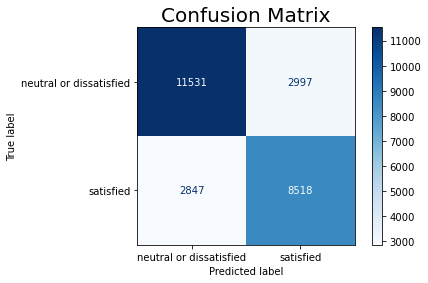

In [24]:
# plot for confusion matrix
from sklearn.metrics import plot_confusion_matrix

print("LogisticRegression")
plot_confusion_matrix(classifier, X_test, y_test,cmap="Blues",values_format="d",display_labels=["neutral or dissatisfied", "satisfied"])
plt.title("Confusion Matrix", fontsize=20)
plt.grid(b=False)
plt.show()

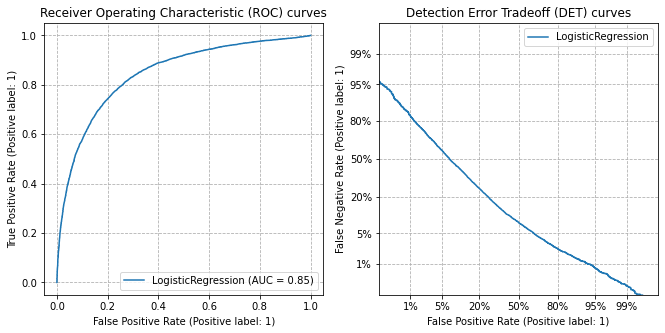

In [25]:
# plot receiver operating characteristic (ROC) curve and detection error tradeoff (DET) curves
# A ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system 
# as its discrimination threshold is varied. 
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) 
# at various threshold settings. The true-positive rate is also known as sensitivity, recall.

# A detection error tradeoff (DET) graph is a graphical plot of error rates for binary classification systems, 
# plotting the false negative rate vs. false positive rate

from sklearn import datasets, metrics, model_selection
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(classifier, X_test, y_test, ax=ax_roc)
plot_det_curve(classifier, X_test, y_test, ax=ax_det)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

 # Add Linear SVM and RandomForest classifier


LogisticRegressionClassifier Report
Accuracy Score : 0.7743019348858765
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     14528
           1       0.74      0.75      0.74     11365

    accuracy                           0.77     25893
   macro avg       0.77      0.77      0.77     25893
weighted avg       0.77      0.77      0.77     25893

Linear SVMClassifier Report
Accuracy Score : 0.8706986444212722
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893

Random ForestClassifier Report
Accuracy Score : 0.8540145985401459
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     14528
           1       0.87      0.79 

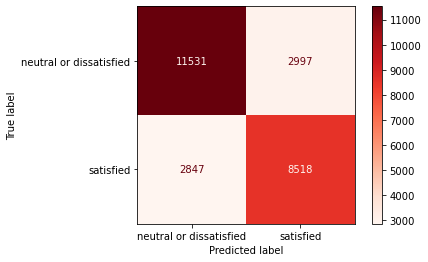

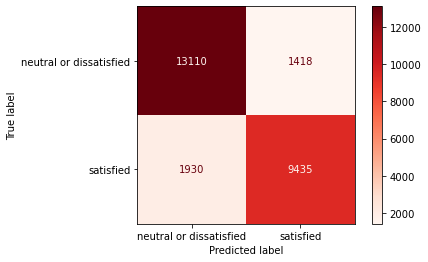

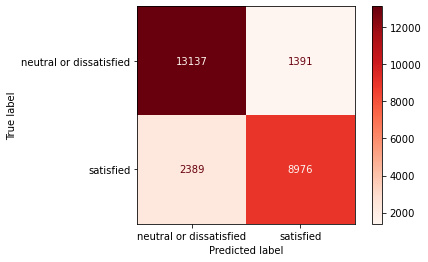

In [36]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifiers = {
    "LogisticRegression": LogisticRegression(solver='lbfgs', random_state=1),
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025)),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1),
     
}

# for loop for classification_reports
for name, clf in classifiers.items():
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
    print(name+"Classifier Report")
    plot_confusion_matrix(clf, X_test, y_test,cmap="Reds",values_format="d",display_labels=["neutral or dissatisfied", "satisfied"])
    print(f"Accuracy Score : {acc_score}")
    print(classification_report(y_test, predictions))



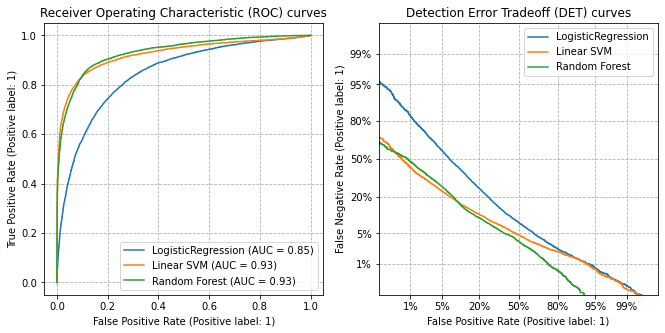

In [27]:

# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    plot_roc_curve(clf, X_test, y_test, ax=ax_roc, name=name)
    plot_det_curve(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [28]:
from sklearn import set_config

set_config(display = 'diagram')
clf

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

# SHAP (SHapley Additive exPlanations)
SHAP is a game theoretic approach to explain the output of any machine learning model.
It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions 

In [29]:
#! pip install shap

In [30]:
import shap

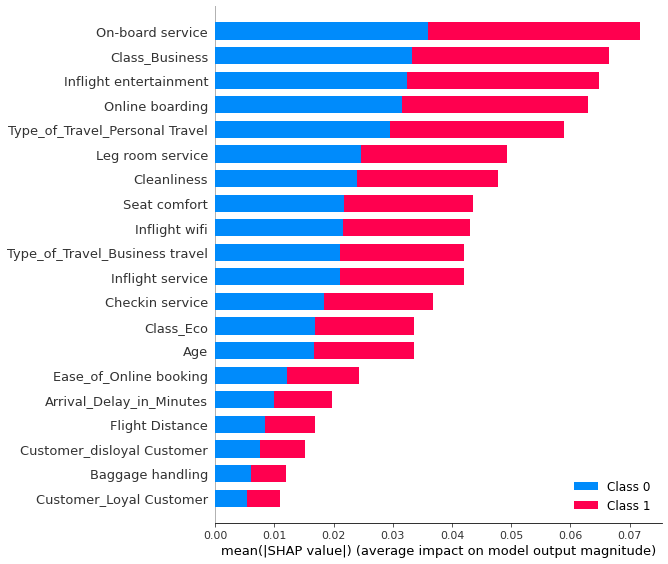

In [31]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Choosing 10 top features
Select features according to the highest chi2 scores.
Univariate feature selection works by selecting the best features based on univariate statistical tests. For classification: chi2, f_classif, mutual_info_classif.
Thechi-square distribution with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables. The chi-square distribution is used primarily in hypothesis testing, and to a lesser extent for confidence intervals for population variance when the underlying distribution is normal.

In [37]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=10).fit(X_train, y_train)
print(X_train.columns[X_new.get_support(indices=True)])

Index(['Age', 'Flight Distance', 'Online boarding', 'Inflight entertainment',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'Type_of_Travel_Business travel', 'Type_of_Travel_Personal Travel',
       'Class_Business', 'Class_Eco'],
      dtype='object')
